In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
def fa(x=1,y=1,**kwargs):
    fig,ax = plt.subplots(x,y,**kwargs)
    return fig,ax
%matplotlib notebook
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, optimizers

from tqdm import tqdm
import time
import collections
import pandas as pd

def plot_dataset(x,y,**kwargs):
    plt.scatter(x,y,alpha=0.3,marker='.',**kwargs)


# Non-linear Least Squares

https://www.youtube.com/watch?v=RyhOBY5qUQI
https://www.youtube.com/watch?v=lsKIhNkzpbw

This is the function we would like to fit, it has two parameters, a and b.
$$ f(x) = ax\sin(bx) $$

Error is defined as follows:

$$ E(a,b) = \sum_{k=0}^{m}(f(x_k) - y_k)^2 $$

Let's plug our function in it:

$$ E(a,b) = \sum_{k=0}^{m}( ax_k\sin(bx_k) - y_k)^2 $$

We need to find the minimum of this function. At minimum two partial derivatives of $E(a,b)$ wrt $a$ and $b$ are both zeros.

$$ \frac{dE}{da} = 0, \frac{dE}{db} = 0 $$

$$ F(a,b) = \frac{dE}{da} = \sum_{k=0}^{m}2(ax_k\sin(bx_k)-y_k)x_ksin(bx_k) = 0$$

This is because of the chain rule $g(f(x))$ where $g(x) = x^2$. Applying the chain rule to $g(f(x))'$ results in $g'(f(x))f'(x)$.

$$ G(a,b) = \frac{dE}{db} = \sum_{k=0}^{m}2(ax_k\sin(bx_k)-y_k)cos(bx_k)x_k = 0$$

We got as many equations as the number of variables. This is a system of two non-linear equations with both two parameters, $F(a,b) = 0$ and $G(a,b) = 0$. This is not a linear system. You can solve this with the Newton's method to the system.

Because these are non-linear, there is no existence or uniqueness of solutions. Especially, here are we are dealing with sines, there will be probably multiple solutions.

## Newtons' Method

Choose an initial guess: $z^0 = [a^0,b^0]$. The Newton iteration is 

$$ X_{k+1} = X_{k} - \frac{f(X_k)}{f'(X_k)} $$

This iteration will bring the value of X to a special point in the error landscape. But right now $X$ is a vector-valued variable, and we have two functions $F(a,b)$ and $G(a,b)$ both with two variables; therefore we need to introduce Jacobian Matrix. Also this returns only the critical points, which are either minimum, maximum or saddle points.

## Jacobian Matrix

$$ J(a,b) =  \begin{bmatrix}
\frac{\delta F}{\delta a} & \frac{\delta F}{\delta b}\\
\frac{\delta G}{\delta a} & \frac{\delta G}{\delta b}
\end{bmatrix}
$$

The J matrix depends on the input variable. So it is not a conventional matrix with fixed values, the values are changing with its arguments, which is a vector.

Planting this in the Newton's iteration above we have to consider that J is a matrix.

$$ X_{k+1} = X_{k} - J^{-1}(X_k) \begin{bmatrix}F(X_k)\\G(X_k) \end{bmatrix}, X_k=[a,b] $$

So we have these two equations with two variables, that we need to differentiate to create the Jacobian:

$$ F(a,b) = \frac{dE}{da} = \sum_{k=0}^{m}2(ax_k\sin(bx_k)-y_k)x_ksin(bx_k) = 0$$
$$ G(a,b) = \frac{dE}{db} = \sum_{k=0}^{m}2(ax_k\sin(bx_k)-y_k)cos(bx_k)x_k = 0$$

<IPython.core.display.Javascript object>


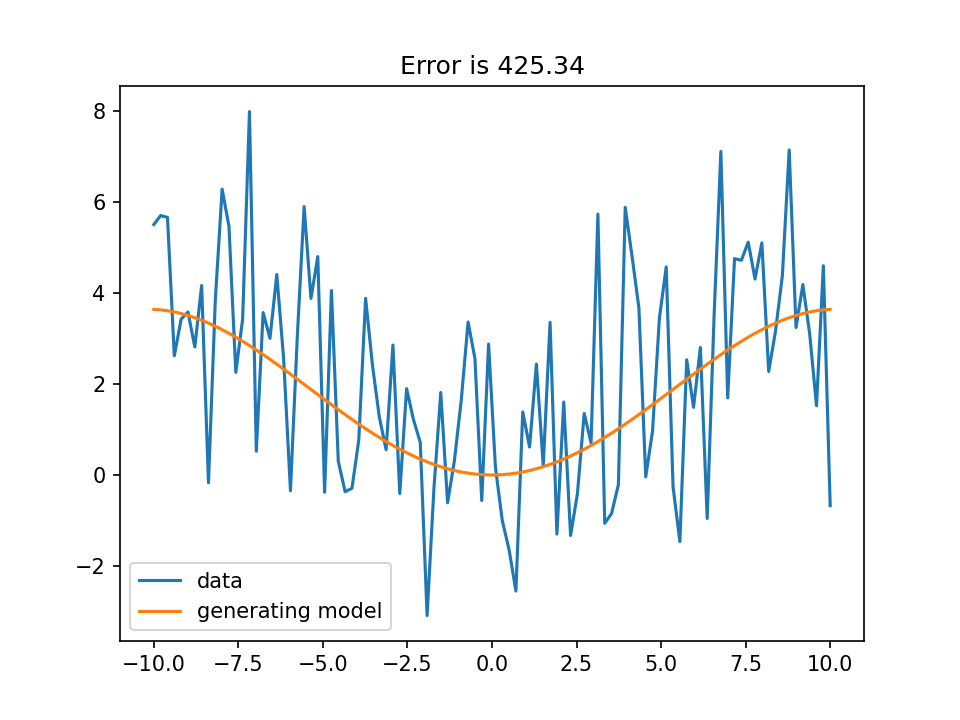

<IPython.core.display.Javascript object>


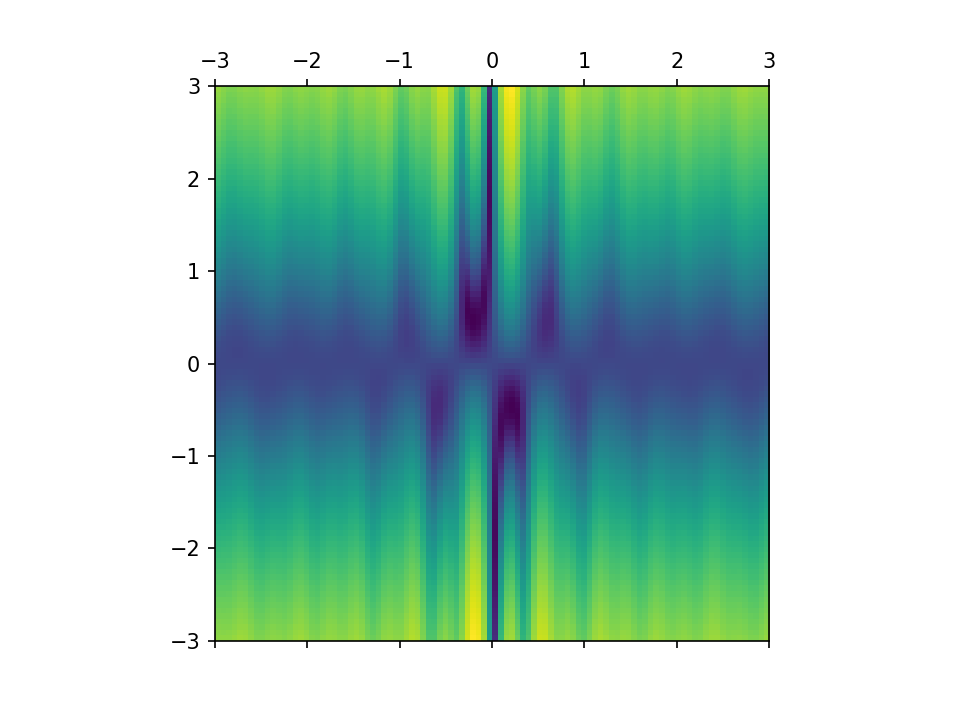

In [2]:
#let's generate some data first:
x = np.linspace(-10.,10.,100)
params = {'a' : 0.4, 'b' : 0.2,'x' : x}
def fun(x,a=1.,b=1.):
    return a*x*np.sin(b*x)

def data(fun,**kwargs):
    y = fun(**kwargs) 
    y = y + np.random.randn(y.shape[0])*2
    return y

#plot the error surface
def errorfunction(y,fun,**kwargs):
    e = np.sum((fun(**kwargs) - y) ** 2)
    return e

def error_surface(param_space,y,fun,**kwargs):
    e = list()
    for a in param_space:
        for b in param_space:
            params['a'] = a
            params['b'] = b
            e.append(errorfunction(y,fun,**params))
    e = np.reshape(e,[T,T])
    return e

y = data(fun,**params)
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.plot(x,fun(**params))
ax.set_title(f"Error is {np.round(errorfunction(y,fun,**params),2)}")
ax.legend(['data','generating model'])

fig, ax = plt.subplots(1,1)
T = 100
param_space = np.linspace(-3.,3.,T)
S = error_surface(param_space,y,fun,**params)
ax.matshow(np.log10(S),extent=(np.min(param_space),np.max(param_space),np.min(param_space),np.max(param_space)))

## Back Propagation:
based on the first lecture Deep Learning from LeCun:

https://www.youtube.com/watch?v=d9vdh3b787Y&list=PLLHTzKZzVU9eaEyErdV26ikyolxOsz6mq&index=4&t=0s
    
    
- Algorithm that learns from the training set is expected to generalize to the test set because of the redundancy in the dataset.

- NN: Stacked linear and non-linear blocks. Without non-linearities the network collapses to a single matrix.

- $$ s[i] = \sum_{j\in{UP(i)}}{ w[i,j] z[j] } $$ 

- UP operator means all precessor of j.

- The activation of unit $s[i]$ at the next layer, is the weighted sum of all activations from the previous layer z[j] using the weights w[i,j].

- s[j] -> non-linear function h -> z[j] -> weighted sum -> s[i] -> non-linear fun h -> z[i]

- h is non-linear activation function

- $$ z_j = h(s_j) $$ 

- weights makes data move from one layer to the next

- $$ s_i = z_j * w_{i,j} $$

- $$ z_i = h(s_i) $$

- Chain Rule:

$$ g(h(s))' = g'(h(s))h'(s) $$

- So the change rate of a function of a function, $g(h(s))$, is related to derivative of the inner function weighted by the derivative of the outer function evaluated at that point. 

- In words, if the outer function has a derivative of zero, changes originating from the first function will be cancelled. If you are located on the far tail of a sigmoid function, however strongly you perturb the input variable and the inner function, the plateau of the sigmoid will simply cancel all this changes.

- The outer function can also amplify the change rate of the first function.

- So from one layer to the next, the question we are asking, is how much a perturbation $\Delta s$ results in changes in the cost function. We just ask this question at every single layer of the network to span the whole depth.

    - when the first activation is perturbed by $\Delta s_1$, the subsequent layer $z_1$ is perturbed by $\Delta z_1$, which is equal to $h'(s_1)\Delta s_1$.
    
    - The same holds also for subsequent layer $s_2$, which is $\Delta s_2 = w\Delta z_1$
    - Replacing $\Delta z_1$ with the above equality, we obtain $\Delta s_2 = w\Delta h'(s_1)\Delta s_1$
    - this pattern is chained together for the rest of the network.

## Soft(arg)max

Softmax takes a vector of real number scores (logits, logits are output of the network) and converts them to a probability distribution in the sense that these numbers sums to 1 after passing through the softmax. It returns the another vector of same size.

Typically, we need to find the class with maximum score, however this argmax operation is not differentiable. Instead with softmax we try to "soften" this max operation and make out of it a differentiable function.

The question is why actually we use a base of $e$ to achieve this. Actually any base would produce exactly the same result as to achieving a unit sum. Using a base that is bigger than $e$ would result in even more sparse distribution of probabilities, (or said the otherway, using a base close to 1 would make the probabilities more uniform than $e$).

Interesting discussion:
https://datascience.stackexchange.com/questions/23159/in-softmax-classifier-why-use-exp-function-to-do-normalization#:~:text=You%20said%20%22the%20softmax%20function,the%20predictions%20and%20the%20truth%22.&text=With%20the%20same%20reasoning%20we,Exaggerating%20here%2C%20of%20course).

$$\sigma(z) = \frac{e^z}{\sum_j{e^{z_j}}}$$

## Example

<IPython.core.display.Javascript object>


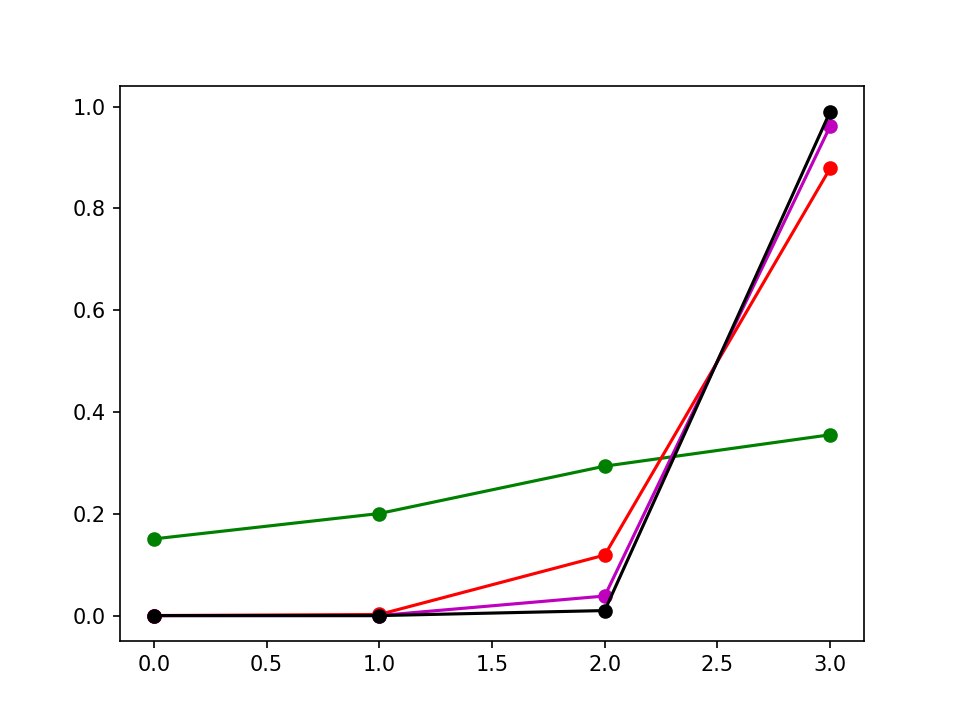

In [3]:
def softmax(Z,base=math.e):
    return base ** Z / np.sum(base ** Z)
    
scores = np.array([1,4,8,10])
# plt.plot(scores,'o-')
f,ax = fa()
ax.plot(softmax(scores,1.1),'go-')
ax.plot(softmax(scores),'ro-')
ax.plot(softmax(scores,5),'mo-')
ax.plot(softmax(scores,10),'ko-')
plt.show()

# Classification
## Log Loss

This is a cost function that can be used in a classification context for optimizing probabilities, which are always in the range between 0 and 1. The closer probabilities reach to 1 for the correct class the bigger the loss function. 

$log(close to 1)$ is a big negative number close to zero, whereas for extremely small number, the log returns very small negative numbers.

# Entropy

Entropy measures the uncertainty of a discrete distribution. It is maximized when all elements are uniformly distributed, and minimized when all the probability density is located only on one unique class (deterministic distribution).

$$H(X)=-\sum_kp(x_k)*log_2(p(x_k))$$

The uniform distribution with K classes has an entopy of $-log_2(1/K)$. For 5 classes we have 2.32.

Entropy is the number of bits that a communication channel needs to use to optimally transmit a set of states.
Example: We would like to communicate 8 states over a communication channel. These could be encoded as [000,001,010,...,111], totaling to $2^3$ messages. It is straightforward to see that when every single message occurs equally likely this communication requires 3 bits of information transmitted on average.

Now, if some of the states happened to be more often than others, we could code them with messages that are smaller in size to reduce the total average number of bits transmitted. Therefore there is an optimal way of encoding a state in terms of the lenght of the message that is sent.

KL divergence measures the difference in the number of bits when encoding a bunch of states coming from situation B, using an optimal set of messages for situation A.

# KL-Divergenz (relative entropy)
(Nice read on entropy: https://www.youtube.com/watch?v=ErfnhcEV1O8)

Measures the dissimilarity between two distributions p and q.

$$ KL(p || q ) = \sum_k{p_klog_2(\frac{p_k}{q_k})}$$ 

re-write this after expanding the ratio:

$$ KL(p || q ) = \sum_k{p_k ( log_2(p_k)-log_2(q_k))}$$ 

$$ KL(p || q ) = \sum_k{p_klog_2(p_k)-p_klog_2(q_k)}$$ 

$$ KL(p || q ) = \sum_k{p_klog_2(p_k)}-\sum_k{p_klog_2(q_k)}$$ 

$$ KL(p || q ) = -H(p) - \sum_k{p_klog_2(q_k)}$$ 

$$ KL(p || q ) = -H(p) + H(p,q)$$ 

which tells us that the KL-distance is the difference between two terms. The first one is the entropy of X and the second is the cross-entropy of $q$ relative to $p$.

$$ H(p,q) = -\sum_k{p_klog_2(q_k)} $$

Cross-entropy tells us the average number of bits needed to encode data coming from source  p using a codebook that is optimal for source q. This will be a number that is always bigger than the entropy of the source, unless p = q.

KL divergence tells us about the number of extra bits required to encode the data when we use the model q to represent data in p. KL divergence is always positive and equal to 0 when p = q.

## Exercice:
The following shows the asymmetrical property of the DKL distance. 

$DKL(p||q)$ means the increase in average transmitted number of bits for tranmitting $p$ when the codebase is optimal for $q$:

![DKL](pics/DKL_00.png)
![DKL](pics/DKL_01.png)
![DKL](pics/DKL_02.png)
![DKL](pics/DKL_03.png)
![DKL](pics/DKL_04.png)
![DKL](pics/DKL_05.png)
![DKL](pics/DKL_06.png)
![DKL](pics/DKL_07.png)

In [4]:
def Xentropy(x,y):
    return -np.dot(x, np.log2(y))

u = np.tile(np.array(1/5),(5,))
x = np.array([0.3,.2,.1,.2,.3])
y = np.array([0.3,.2,.1,.15,.35])
z = np.array([0.3,.2,.1,.35,.05])
a = np.array([.025,.025,0.9,.025,.025])

    
print(f"Entropy of u {Xentropy(u,u)} (max)")
print(f"Entropy of x {Xentropy(x,x)}")
print(f"Entropy of y {Xentropy(y,y)}")
print(f"Entropy of a {Xentropy(a,a)}")
print(f"X-Entropy of x,y {Xentropy(x,y)}")
print(f"X-Entropy of x,z {Xentropy(x,z)}")
print(f"X-Entropy of x,a {Xentropy(x,a)}")
print(f"X-Entropy of x,u {Xentropy(x,u)}")
print(f"KL(x,y) = {-Xentropy(x,x) + Xentropy(x,y) }")
print(f"KL(x,z) = {-Xentropy(x,x) + Xentropy(x,z) }")
print(f"KL(x,a) = {-Xentropy(x,x) + Xentropy(x,a) }")

Entropy of u 2.321928094887362 (max)
Entropy of x 2.303143403943405
Entropy of y 2.2583135563314167
Entropy of a 0.6689955935892812
X-Entropy of x,y 2.3194331773982393
X-Entropy of x,z 2.9171611697482307
X-Entropy of x,a 5.337128404231867
X-Entropy of x,u 2.5541209043760986
KL(x,y) = 0.0162897734548344
KL(x,z) = 0.6140177658048258
KL(x,a) = 3.0339850002884625


In [5]:
# 

# Optimization
https://www.youtube.com/watch?v=--NZb480zlg&list=PLLHTzKZzVU9eaEyErdV26ikyolxOsz6mq&index=8

## Gradient Descent: GD (full-batch)
"Gradient descent is the worst optimization method in the world."

$$ \min\limits_{w} f(w) $$

Follow the direction of local negative gradient with small steps.

$$ w_{k+1} = w_k - \gamma_k \triangledown f(w_k) $$

where $\gamma_k$ is step size, $\triangledown$ is the gradient of f and $w$ are a large collection of weights at the last and next iterations.

The gradient cuts entire half of the space.

Learning rate is an important parameter that will be decisive on how far you come close to true solution. 

Most of the time, training a network corresponds on adjusting the step-size that leads to best results:

- If the step-size is less than the optimal, convergence will take longer, progress will be steady. The trajectory will follow a path with small steps. 
- On the other hand, if it is larger, than it might make zig-zags (jumping from one hill to the other) leading also in convergence being slow. 
- When the step-size is much greater than the optimal, the solution can simply diverge away from the solution.
![Convergence](StepSize.png)
==> Practically, we will be having learning-rate that are slightly bigger than the optimal one, this will bring us to the convergence faster than the case where the learning rate is small. 
==> Almost always, we operate at the edge of divergence.
==> Practically, you try multiple ones on a log-scale and take the best one.
==> Learning rate can also be changed during learning.

## Stochastic Optimization: SGD (mini-batch)

"SGD is often the best optimization method available."

$$ \min\limits_{w} f(w) = \frac{1}{n}\sum_i^n{f_i(w)}$$
$$ f_i(w) = l(x_i,y_i,w) $$

Follow the direction of local negative gradient with small steps.

$$ w_{k+1} = w_k - \gamma_k \triangledown f_i(w_k) $$ where $i$ is chosen uniformly at random.

Practically, we use minibatches for SDG. 

Distributed training is also possible with SDG, where we distribute a large mini-batch to several computers. You can reduce training time from days to hours. (https://research.fb.com/wp-content/uploads/2017/06/imagenet1kin1h5.pdf)


### SDG has many benefits: 

SDG is actually a noisy version of GD. But this noise is actually beneficial as it prevents the convergence to be stuck at a bad local minimal ==> Annealing

Plain SDG (invented at 60s) with momentum (an innovation) is still the best method to train large networks.

### Momentum:

SGD + Momentum = Stochastic heavy ball method

Momentum parameter needs to be tuned as well.

$$ w_{k+1} = w_k - \gamma_k \triangledown f_i(w_k) + \beta_k(w_k-w_{k-1})$$

Beta of 0.9 or 0.99 works almost always well. However you have to change the step size to keep it constant across different beta values. Increase of beta => Decrease of step size. Actually scale it by 1/beta to keep the step-size balanced.

Momentum leads to smaller step size with learning.

The last term is the extra-term on top of SGD. The next step becomes a combination of the previous step's direction adn the new negative gradient.

In case you need full-batch optimization:
Practically you can use `torch.optim.LBFGS` or `scipy.optimize.fmin_l_bfgs_b`, the scipy is really bullet proof. This is better than GD.


<IPython.core.display.Javascript object>


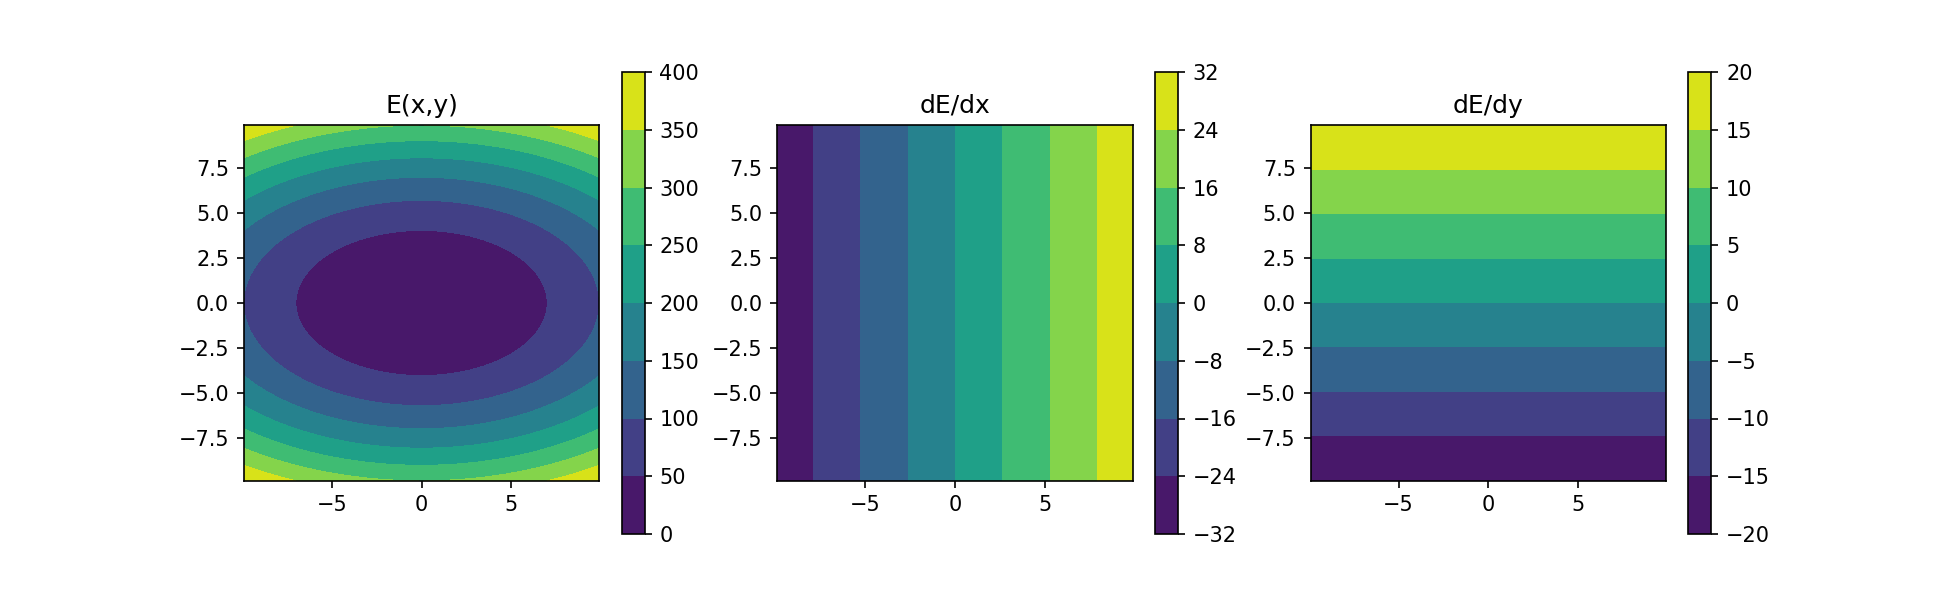

In [53]:
#Let's setup the error landsscape
def error(w1,w2):    
    return np.array([(x ** 2 + 3*y ** 2) for x,y in zip(w1,w2)])
def d_error_d_x(w1,w2):
    return np.array([(3*x ) for x,y in zip(w1,w2)])
def d_error_d_y(w1,w2):
    return np.array([(2*y ) for x,y in zip(w1,w2)])

size = 100
y,x = np.meshgrid(np.linspace(-10,10,size),np.linspace(-10,10,size))
L = error(y.reshape(-1),x.reshape(-1)).reshape((size,size))
dLdx   = d_error_d_x(y.reshape(-1),x.reshape(-1)).reshape((size,size))
dLdy   = d_error_d_y(y.reshape(-1),x.reshape(-1)).reshape((size,size))

f,a = fa(1,3,figsize=(13,4))
img = a[0].contourf(L,extent=[-10,10,-10,10],origin='lower')
a[0].set_title('E(x,y)')
a[0].axis('square')
plt.colorbar(img,ax=a[0])

img    = a[1].contourf(dLdx,extent=[-10,10,-10,10],origin='lower')
a[1].set_title('dE/dx')
a[1].axis('square')
plt.colorbar(img,ax=a[1])
#
img = a[2].contourf(dLdy,extent=[-10,10,-10,10],origin='lower')
a[2].set_title('dE/dy')
a[2].axis('square')
plt.colorbar(img,ax=a[2])

<IPython.core.display.Javascript object>


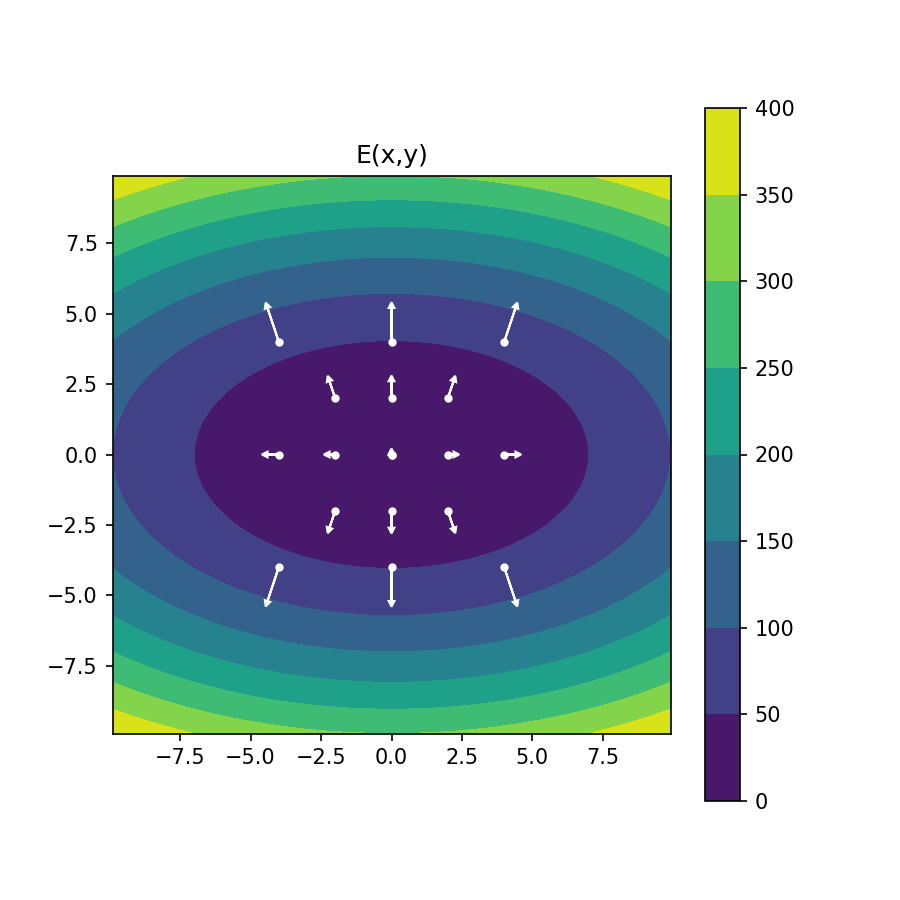

In [54]:
#Let's draw one step starting from position (x,y) as an arrow
c = (4,5)
def gradient(X):
    #computes gradient at position defined by vector X for x^2 + y^2
    return np.array([2*X[0],6*X[1]])
# At each point (x,y), we have 2 derivative functions and two variables. 
# The Jacobian will have the following form:
# df/dx, df/dy
# dg/dx, dg/dy, where the first column collects all equations that contributes to the x-dimension, 
# and second column all for the second dimension.
#
# 
def plot_me_gradient(coordinate,ax,scaler=10,GRADIENT=None,**kwargs):
    # you can directly pass the gradient, if not it is computed with the function above.
    ax.plot(coordinate[0],coordinate[1],'w.')
#     if the gradient is passed then don't compute it.
    if GRADIENT is None:
        V = gradient(coordinate)
    else:
        V = GRADIENT
    V = V/scaler
    ax.arrow(coordinate[0],
             coordinate[1],V[0],V[1],
             head_width=.2, 
             head_length=.2,
             **kwargs)
    
f,a = fa(1,1,figsize=(6,6))
img = a.contourf(L,extent=[-10,10,-10,10],origin='lower')
a.set_title('E(x,y)')
a.axis('square')
plt.colorbar(img,ax=a)

for x,y in zip(np.array([-1,-1,-1,0,0,0,1,1,1,-2,-2,-2,0,0,0,2,2,2])*2,np.array([-1,0,1,-1,0,1,-1,0,1,-2,0,2,-2,0,2,-2,0,2])*2):
    plot_me_gradient(coordinate=[x,y],ax=a,scaler=20,color='w')

<IPython.core.display.Javascript object>


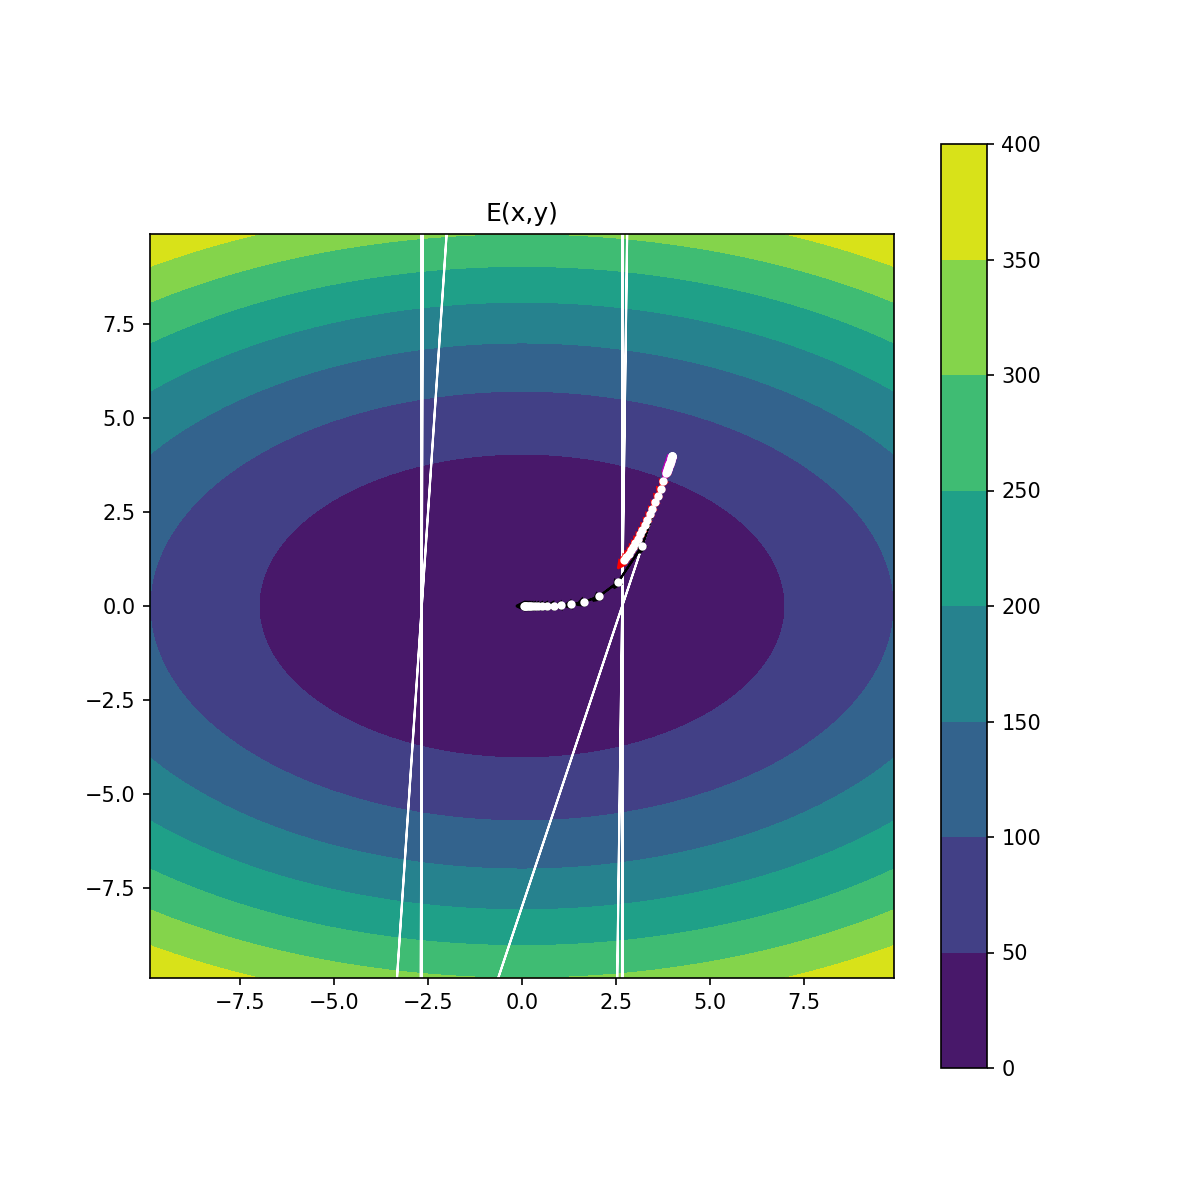

In [55]:
# now that we can compute gradients and plot them, we are all what we need to make one step along the steepest descent.
f,a = fa(1,1,figsize=(8,8))
img = a.contourf(L,extent=[-10,10,-10,10],origin='lower')
a.set_title('E(x,y)')
a.axis('square')
plt.colorbar(img,ax=a)
total_iter = 20
for color, gamma in zip(['w','k','r','m'],[1,.1,.01,.001]):
    coor_old        = np.array([4.,4.])
    iter = 0
    while iter < total_iter:
        iter += 1
        G = gradient(coor_old)
        coor_new = coor_old - gamma*G
        plot_me_gradient(coor_old,ax=a,scaler=1/gamma,GRADIENT=-G,color=color)
        coor_old = coor_new        
        

## Adaptive Methods:

The idea is to have a weight-specific learning rate for each weight.